# COMP309 - a4
### Elliott Rose
### 300540768
## Auto Encoder:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

(0.0284317284822464,
 2.0050515979528427,
 0.06557026356458663,
 2.004101099073887)

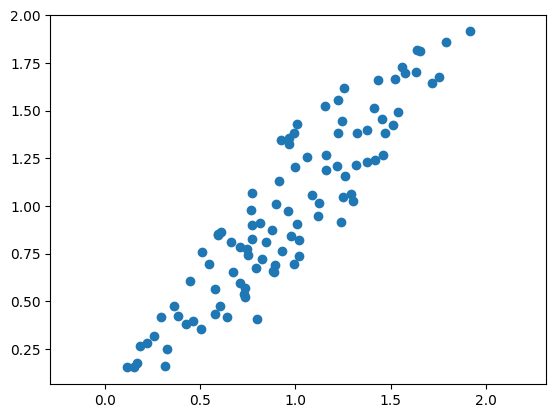

In [4]:
# random data
D = 2
x = torch.rand(100, D)
steps = 1000

x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

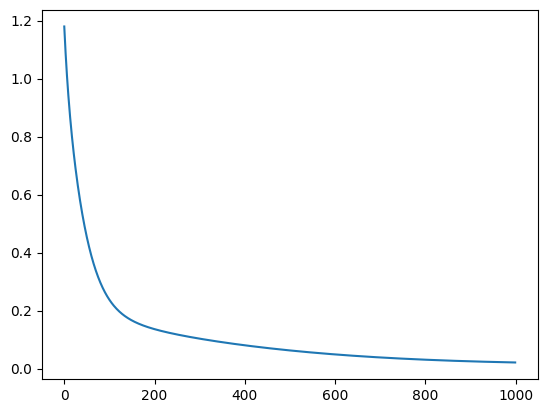

(-0.14371920190751553,
 2.013249261304736,
 -1.3012771666049958,
 2.107442504167557)

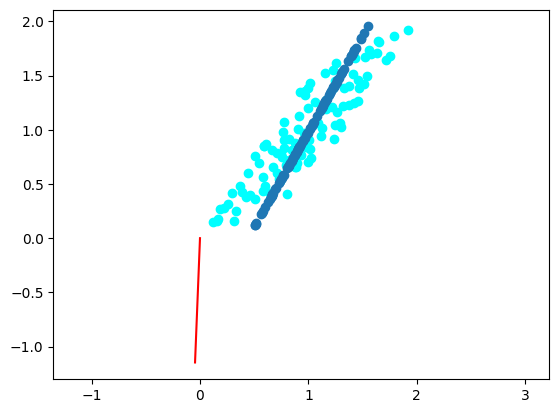

In [5]:

wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)

def encoder(x):
    z = torch.matmul(x, wEncoder) + bEncoder
    return z

def decoder(z):
    x = torch.matmul(z, wDecoder) + bDecoder
    return x

def loss(x, reconstruction):
    mse = torch.mean((x - reconstruction)**2)
    return mse

op = torch.optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01)
loss_list = []

for step in range(steps):
    op.zero_grad()
    new_x = decoder(encoder(x))
    l = loss(x, new_x)
    loss_list.append(l.detach())
    l.backward()
    op.step()
    
plt.plot(loss_list)
plt.show()

plt.scatter(x[:,0],x[:,1],color='cyan')
plt.scatter(new_x.detach()[:,0],new_x.detach()[:,1])
plt.plot([0,wEncoder[0,0].detach()], [0,wEncoder[1,0].detach()],'-r')
plt.axis('equal')


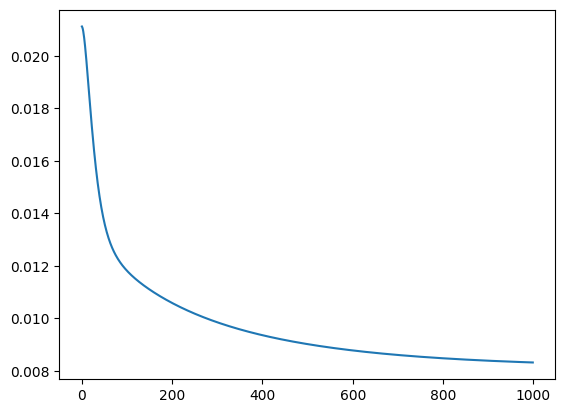

(-0.7017909675836563,
 2.039824107289314,
 -1.0237346202135087,
 2.1055068880319596)

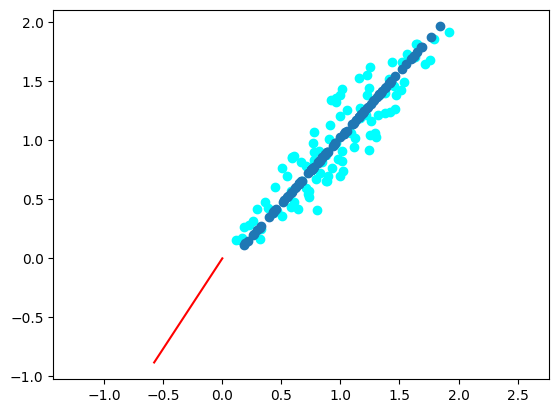

In [6]:
op = torch.optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01, momentum=0.9)
loss_list = []

for step in range(steps):
    op.zero_grad()
    new_x = decoder(encoder(x))
    l = loss(x, new_x)
    loss_list.append(l.detach())
    l.backward()
    op.step()
    
plt.plot(loss_list)
plt.show()

plt.scatter(x[:,0],x[:,1],color='cyan')
plt.scatter(new_x.detach()[:,0],new_x.detach()[:,1])
plt.plot([0,wEncoder[0,0].detach()], [0,wEncoder[1,0].detach()],'-r')
plt.axis('equal')

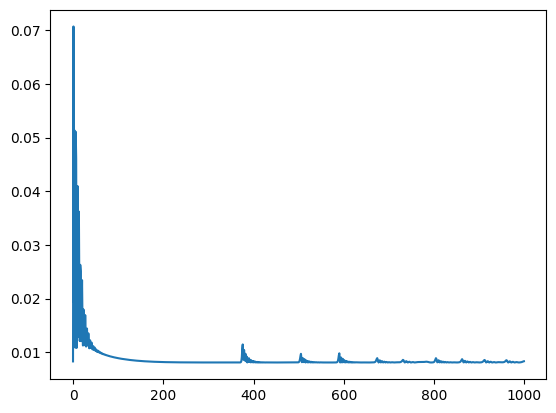

(-1.4008194208145142,
 2.0731111764907837,
 -1.5321227371692658,
 2.1615088045597077)

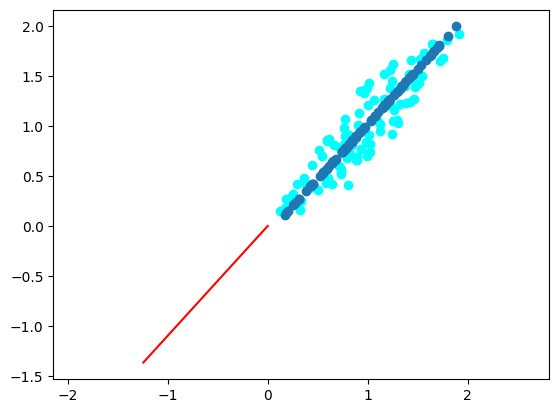

In [7]:
op = torch.optim.RMSprop([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01, momentum=0.9)
loss_list = []

for step in range(steps):
    op.zero_grad()
    new_x = decoder(encoder(x))
    l = loss(x, new_x)
    loss_list.append(l.detach())
    l.backward()
    op.step()
    
plt.plot(loss_list)
plt.show()

plt.scatter(x[:,0],x[:,1],color='cyan')
plt.scatter(new_x.detach()[:,0],new_x.detach()[:,1])
plt.plot([0,wEncoder[0,0].detach()], [0,wEncoder[1,0].detach()],'-r')
plt.axis('equal')